In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

**IMPORTING DATA**

In [6]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6429,6430,15623102,Nnaemeka,713,Spain,Male,38,6,116980.78,2,0,1,76038.38,0
1623,1624,15804516,Builder,589,France,Male,38,2,0.00,1,1,0,79915.28,0
9136,9137,15688984,Belonwu,595,France,Male,20,4,95830.43,1,1,0,177738.98,0
3448,3449,15610903,Chukwueloka,560,Spain,Female,31,5,125341.69,1,1,0,79547.39,0
8710,8711,15683522,Kennedy,678,Germany,Female,37,2,113383.07,1,1,1,135123.96,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [9]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:

df2=pd.get_dummies(df1,columns=['Geography','Gender'],drop_first=True)

In [15]:
df2[['Geography_Germany','Geography_Spain','Gender_Male']]=df2[['Geography_Germany','Geography_Spain','Gender_Male']].astype(int)

In [16]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [47]:
X=df2.drop("Exited",axis=1)
Y=df2['Exited']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


**MODEL BUILDING**

In [51]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [55]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6492 - accuracy: 0.6625 - val_loss: 0.5257 - val_accuracy: 0.7925
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.8000 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4406 - accuracy: 0.8103 - val_loss: 0.4359 - val_accuracy: 0.8081
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8152 - val_loss: 0.4258 - val_accuracy: 0.8081
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8198 - val_loss: 0.4182 - val_accuracy: 0.8106
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8223 - val_loss: 0.4089 - val_accuracy: 0.8169
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8270 - val_loss: 0.3959 - val_accuracy: 0.8306

In [56]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [57]:
y_pred=np.where(y_log>=0.5,1,0)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.86

**VISUALISING RESULTS**

In [59]:
import matplotlib.pyplot as plt

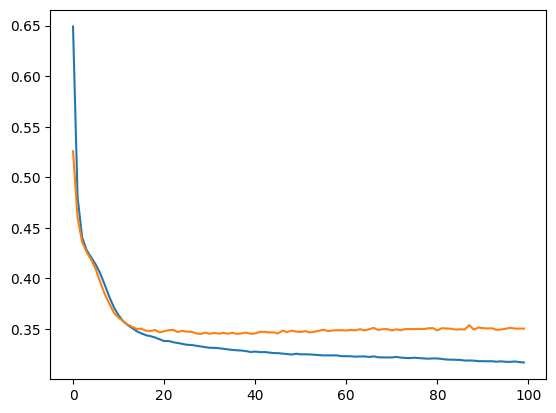

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

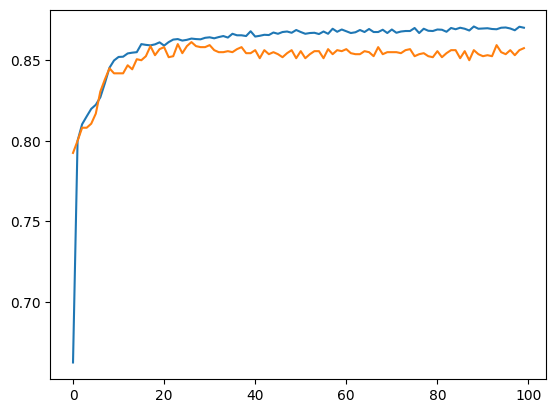

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])